In [19]:
import pandas as pd
import numpy as np
import missingno as msno
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt

In [7]:
try:
    cyber_C = pd.read_table('cyber_crimes.csv')
    print("Let's go..................")
except:
    print('No such dataset...........')

Let's go..................


In [8]:
# check 1st 5 rows

cyber_C.head()

,S. No,Category,State/UT,2016,2017,2018,Percentage Share of State/UT (2018),Mid-Year Projected Population (in Lakhs) (2018)+,Rate of Total Cyber Crimes (2018)++
0,1,State,Andhra Pradesh,616,931,1207,4.4,520.3,2.3
1,2,State,Arunachal Pradesh,4,1,7,0.0,14.9,0.5
2,3,State,Assam,696,1120,2022,7.4,340.4,5.9
3,4,State,Bihar,309,433,374,1.4,1183.3,0.3
4,5,State,Chhattisgarh,90,171,139,0.5,284.7,0.5


In [9]:
cyber_C.tail()

,S. No,Category,State/UT,2016,2017,2018,Percentage Share of State/UT (2018),Mid-Year Projected Population (in Lakhs) (2018)+,Rate of Total Cyber Crimes (2018)++
34,34,Union Territory,Delhi UT,98,162,189,0.7,195.6,1.0
35,35,Union Territory,Lakshadweep,0,0,4,0.0,0.7,6.0
36,36,Union Territory,Puducherry,2,5,14,0.1,14.8,0.9
37,Union Territory,Union Territory,Total UT(s),130,203,244,0.9,236.0,1.0
38,Total (All India),Total (All India),Total (All India),12317,21796,27248,100.0,13233.8,2.1


In [10]:
#Check columns -> 

cyber_C.keys()

Index(['S. No', 'Category', 'State/UT', '2016', '2017', '2018',
       'Percentage Share of State/UT (2018)',
       'Mid-Year Projected Population (in Lakhs) (2018)+',
       'Rate of Total Cyber Crimes (2018)++'],
      dtype='object')

In [11]:
# check the number of rows and columns in the dataset -> 

cyber_C.shape

(39, 9)

In [24]:
# check the count of features/ non-null values in each column -> 

cyber_C.count()

S. No                                               39
Category                                            39
State/UT                                            39
2016                                                39
2017                                                39
2018                                                39
Percentage Share of State/UT (2018)                 39
Mid-Year Projected Population (in Lakhs) (2018)+    39
Rate of Total Cyber Crimes (2018)++                 39
dtype: int64

In [12]:
# More understanding of the dataset -> 

cyber_C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   S. No                                             39 non-null     object 
 1   Category                                          39 non-null     object 
 2   State/UT                                          39 non-null     object 
 3   2016                                              39 non-null     int64  
 4   2017                                              39 non-null     int64  
 5   2018                                              39 non-null     int64  
 6   Percentage Share of State/UT (2018)               39 non-null     float64
 7   Mid-Year Projected Population (in Lakhs) (2018)+  39 non-null     float64
 8   Rate of Total Cyber Crimes (2018)++               39 non-null     float64
dtypes: float64(3), int64(3),

In [13]:
#check datatypes of all the columns -> 

cyber_C.dtypes

S. No                                                object
Category                                             object
State/UT                                             object
2016                                                  int64
2017                                                  int64
2018                                                  int64
Percentage Share of State/UT (2018)                 float64
Mid-Year Projected Population (in Lakhs) (2018)+    float64
Rate of Total Cyber Crimes (2018)++                 float64
dtype: object

In [14]:
# Let's replace the empty strings with NaN values

cyber_C = cyber_C.replace(' ', np.nan)

In [15]:
# Let's replace the question marks (?) with NaN values

cyber_C = cyber_C.replace('?', np.nan)

In [16]:
# Let's replace the question marks (.) with NaN values

cyber_C = cyber_C.replace('.', np.nan)

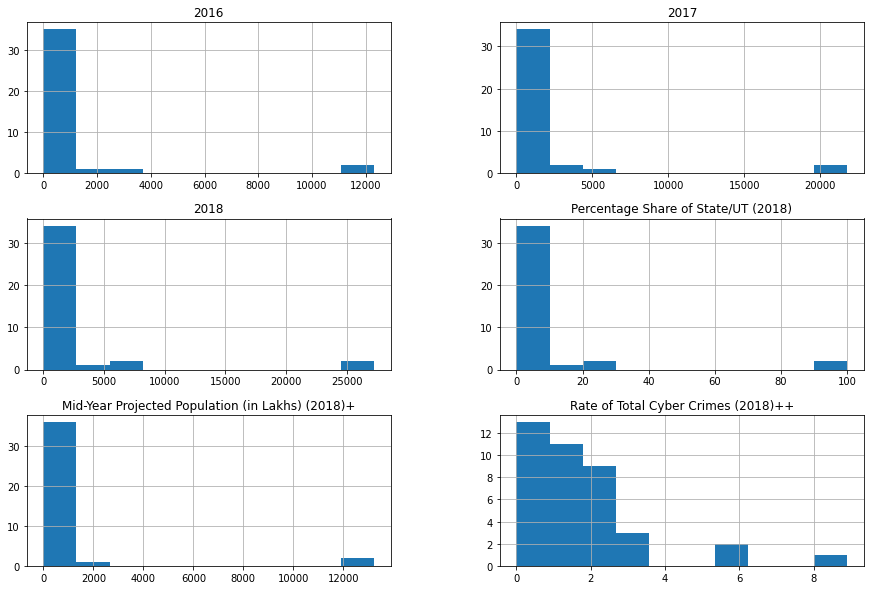

In [20]:
# check hist
cyber_C.hist(figsize=(15, 10))
plt.show()

In [21]:
# determine the number of unique categories in each variable: The output of the preceding code shows the number of distinct categories per variable, that is, the cardinality:

cyber_C.nunique()

S. No                                               39
Category                                             3
State/UT                                            39
2016                                                34
2017                                                35
2018                                                36
Percentage Share of State/UT (2018)                 23
Mid-Year Projected Population (in Lakhs) (2018)+    38
Rate of Total Cyber Crimes (2018)++                 23
dtype: int64

Text(0.5, 1.0, 'Cardinality')

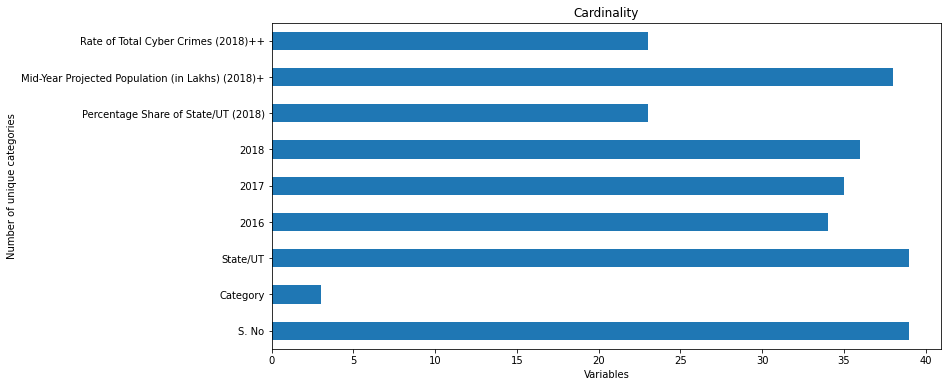

In [23]:
# plot the cardinality:

cyber_C.nunique().plot.barh(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [25]:
# display categorical features/columns -> 

categorical_columns = cyber_C.select_dtypes(include=[np.object0]).columns

categorical_columns

Index(['S. No', 'Category', 'State/UT'], dtype='object')

In [26]:
# display numerical features/columns -> 

numerical_columns = cyber_C.select_dtypes(include=[np.number]).columns

numerical_columns

Index(['2016', '2017', '2018', 'Percentage Share of State/UT (2018)',
       'Mid-Year Projected Population (in Lakhs) (2018)+',
       'Rate of Total Cyber Crimes (2018)++'],
      dtype='object')

In [27]:
# check summary statistics of all numerical columns -> 

cyber_C.describe().T

,count,mean,std,min,25%,50%,75%,max
2016,39.0,947.461538,2724.974532,0.0,9.5,102.0,439.50,12317.0
2017,39.0,1676.615385,4832.658115,0.0,11.5,176.0,772.00,21796.0
2018,39.0,2096.000000,6065.161416,0.0,24.5,239.0,886.50,27248.0
Percentage Share of State/UT (2018),39.0,7.689744,22.257391,0.0,0.1,0.9,3.25,100.0
Mid-Year Projected Population (in Lakhs) (2018)+,39.0,1017.987179,2885.991893,0.7,18.3,284.0,663.85,13233.8
Rate of Total Cyber Crimes (2018)++,39.0,1.689744,1.811193,0.0,0.5,1.0,2.20,8.9


In [28]:
# check for duplicate rows in the dataset -> 

cyber_C.duplicated().sum()

0

In [29]:
# check missing values -> 

cyber_C.isnull().sum()

S. No                                               0
Category                                            0
State/UT                                            0
2016                                                0
2017                                                0
2018                                                0
Percentage Share of State/UT (2018)                 0
Mid-Year Projected Population (in Lakhs) (2018)+    0
Rate of Total Cyber Crimes (2018)++                 0
dtype: int64

In [30]:
# print names or check all columns which have null values -> 

[val for val in cyber_C.columns if cyber_C[val].isnull().sum() > 0]

[]

In [31]:
# Checking correlation - how features are correlated

cyber_C.corr()

,2016,2017,2018,Percentage Share of State/UT (2018),Mid-Year Projected Population (in Lakhs) (2018)+,Rate of Total Cyber Crimes (2018)++
2016,1.00000,0.998590,0.993830,0.993860,0.992970,0.136820
2017,0.99859,1.000000,0.998014,0.998030,0.991394,0.164416
2018,0.99383,0.998014,1.000000,0.999999,0.986735,0.200750
Percentage Share of State/UT (2018),0.99386,0.998030,0.999999,1.000000,0.986789,0.200419
Mid-Year Projected Population (in Lakhs) (2018)+,0.99297,0.991394,0.986735,0.986789,1.000000,0.077051
Rate of Total Cyber Crimes (2018)++,0.13682,0.164416,0.200750,0.200419,0.077051,1.000000


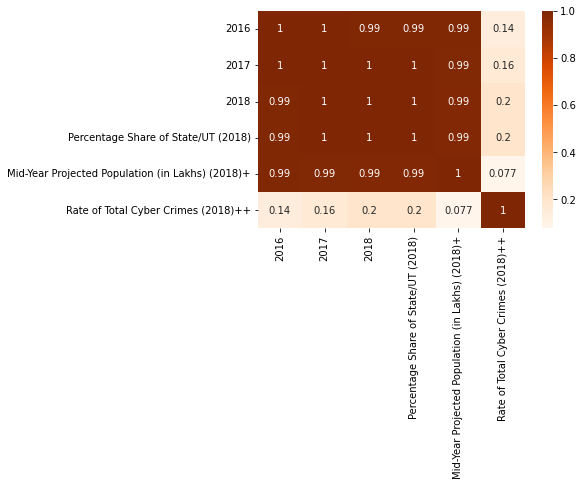

In [32]:
# - then plot the correlation of the top most correlated features:

e = cyber_C.corr()
top_correlated_features = e.index
g = sns.heatmap(cyber_C[top_correlated_features].corr(), annot=True, cmap='Oranges')

`Exploratory Data Analysis`

In [33]:
cyber_C.sample(n=3)

,S. No,Category,State/UT,2016,2017,2018,Percentage Share of State/UT (2018),Mid-Year Projected Population (in Lakhs) (2018)+,Rate of Total Cyber Crimes (2018)++
1,2,State,Arunachal Pradesh,4,1,7,0.0,14.9,0.5
33,33,Union Territory,Daman & Diu,0,0,0,0.0,4.0,0.0
23,24,State,Tamil Nadu,144,228,295,1.1,754.6,0.4


In [38]:
cyber_C.Category.unique()

array(['State', 'Union Territory', 'Total (All India)'], dtype=object)

In [36]:
# rate of total cyber crimes per state
cyber_C.groupby('State/UT')['Rate of Total Cyber Crimes (2018)++'].sum().reset_index()

,State/UT,Rate of Total Cyber Crimes (2018)++
0,A & N Islands,1.8
1,Andhra Pradesh,2.3
2,Arunachal Pradesh,0.5
3,Assam,5.9
4,Bihar,0.3
5,Chandigarh,2.6
6,Chhattisgarh,0.5
7,D&N Haveli,0.0
8,Daman & Diu,0.0
9,Delhi UT,1.0


In [44]:
fig = px.bar(cyber_C.groupby('State/UT')['Rate of Total Cyber Crimes (2018)++'].sum(), color=cyber_C['State/UT'])
fig

=========================

In [45]:
cyber_C.sample(n=3)

,S. No,Category,State/UT,2016,2017,2018,Percentage Share of State/UT (2018),Mid-Year Projected Population (in Lakhs) (2018)+,Rate of Total Cyber Crimes (2018)++
37,Union Territory,Union Territory,Total UT(s),130,203,244,0.9,236.0,1.0
11,12,State,Karnataka,1101,3174,5839,21.4,654.5,8.9
18,19,State,Nagaland,2,0,2,0.0,21.3,0.1


In [46]:
# category per rate of total cyber crimes per state

cyber_C.groupby('Category')['Rate of Total Cyber Crimes (2018)++'].sum().reset_index()

,Category,Rate of Total Cyber Crimes (2018)++
0,State,50.5
1,Total (All India),2.1
2,Union Territory,13.3


In [49]:
fig = px.bar(cyber_C.groupby('Category')['Rate of Total Cyber Crimes (2018)++'].sum())
fig

=====================

In [61]:
cyber_C.sample(n=3)

,S. No,Category,State/UT,2016,2017,2018,Percentage Share of State/UT (2018),Mid-Year Projected Population (in Lakhs) (2018)+,Rate of Total Cyber Crimes (2018)++
22,23,State,Sikkim,1,1,1,0.0,6.6,0.2
36,36,Union Territory,Puducherry,2,5,14,0.1,14.8,0.9
6,7,State,Gujarat,362,458,702,2.6,673.2,1.0


In [64]:
# Mid-Year Projected Population per State

cyber_C.groupby(['Category','State/UT'])['Mid-Year Projected Population (in Lakhs) (2018)+'].sum().reset_index()

,Category,State/UT,Mid-Year Projected Population (in Lakhs) (2018)+
0,State,Andhra Pradesh,520.3
1,State,Arunachal Pradesh,14.9
2,State,Assam,340.4
3,State,Bihar,1183.3
4,State,Chhattisgarh,284.7
5,State,Goa,15.3
6,State,Gujarat,673.2
7,State,Haryana,284.0
8,State,Himachal Pradesh,72.7
9,State,Jammu & Kashmir,134.3


In [68]:
px.bar(cyber_C.groupby(['State/UT'])['Mid-Year Projected Population (in Lakhs) (2018)+'].sum(), color=cyber_C['State/UT'])

==========================

In [69]:
cyber_C.sample(n=3)

,S. No,Category,State/UT,2016,2017,2018,Percentage Share of State/UT (2018),Mid-Year Projected Population (in Lakhs) (2018)+,Rate of Total Cyber Crimes (2018)++
38,Total (All India),Total (All India),Total (All India),12317,21796,27248,100.0,13233.8,2.1
16,17,State,Meghalaya,39,39,74,0.3,32.0,2.3
21,22,State,Rajasthan,941,1304,1104,4.1,765.9,1.4


In [76]:
# percentage crime share  per state

cyber_C.groupby(['Category','State/UT'])['Percentage Share of State/UT (2018)'].sum().reset_index()

,Category,State/UT,Percentage Share of State/UT (2018)
0,State,Andhra Pradesh,4.4
1,State,Arunachal Pradesh,0.0
2,State,Assam,7.4
3,State,Bihar,1.4
4,State,Chhattisgarh,0.5
5,State,Goa,0.1
6,State,Gujarat,2.6
7,State,Haryana,1.5
8,State,Himachal Pradesh,0.3
9,State,Jammu & Kashmir,0.3


In [77]:
px.bar(cyber_C.groupby(['State/UT'])['Percentage Share of State/UT (2018)'].sum(), color=cyber_C['State/UT'])

=============================

In [78]:
cyber_C.sample(n=2)

,S. No,Category,State/UT,2016,2017,2018,Percentage Share of State/UT (2018),Mid-Year Projected Population (in Lakhs) (2018)+,Rate of Total Cyber Crimes (2018)++
3,4,State,Bihar,309,433,374,1.4,1183.3,0.3
18,19,State,Nagaland,2,0,2,0.0,21.3,0.1


In [81]:
# crimes per state in 2016	2017 2018

cyber_C.groupby(['Category','State/UT'])[['2016',	'2017',	'2018']].sum().reset_index()

,Category,State/UT,2016,2017,2018
0,State,Andhra Pradesh,616,931,1207
1,State,Arunachal Pradesh,4,1,7
2,State,Assam,696,1120,2022
3,State,Bihar,309,433,374
4,State,Chhattisgarh,90,171,139
5,State,Goa,31,13,29
6,State,Gujarat,362,458,702
7,State,Haryana,401,504,418
8,State,Himachal Pradesh,31,56,69
9,State,Jammu & Kashmir,28,63,73


In [82]:
px.bar(cyber_C.groupby(['State/UT'])[['2016', '2017', '2018']].sum(), color=cyber_C['State/UT'])

=================

In [83]:
cyber_C.sample(n=2)

,S. No,Category,State/UT,2016,2017,2018,Percentage Share of State/UT (2018),Mid-Year Projected Population (in Lakhs) (2018)+,Rate of Total Cyber Crimes (2018)++
20,21,State,Punjab,102,176,239,0.9,297.0,0.8
33,33,Union Territory,Daman & Diu,0,0,0,0.0,4.0,0.0
